In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import gc
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('C:\\Users\\Tati\\source\\repos\\data_full.csv')
df

,Unnamed: 0,username,hours,products,product_id,text,Polarity,Calif,URL_NAME
0,0,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.000000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
1,1,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.800000,3,Batman_Arkham_Asylum_Game_of_the_Year_Edition
2,2,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.075000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
3,3,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,-0.017647,1,Shadows_of_Adam
4,4,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.000000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
...,...,...,...,...,...,...,...,...,...
2313119,2313119,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...,NaN,2,Rust
2313120,2313120,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...,NaN,2,Rust
2313121,2313121,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!",NaN,2,Rust
2313122,2313122,worldoftanks,82.2,91.0,252490,O yes good waiting long time,NaN,2,Rust


In [3]:
reader=Reader()

In [4]:
data=Dataset.load_from_df(df[['username','product_id','Calif']],reader=reader)

In [5]:
trainset,testset=train_test_split(data,test_size=.3)

In [6]:
algo=SVD()

In [7]:
algo.fit(trainset)

In [8]:
prediction=algo.test(testset)
prediction

[Prediction(uid='SXKI7', iid=227300, r_ui=2.0, est=1.9954031650027733, details={'was_impossible': False}),
 Prediction(uid='iamfilbtw', iid=224260, r_ui=2.0, est=1.9977527906566188, details={'was_impossible': False}),
 Prediction(uid='Ikbee', iid=377840, r_ui=2.0, est=2.0822424539284357, details={'was_impossible': False}),
 Prediction(uid='Matolo™', iid=285310, r_ui=2.0, est=1.9106457059141662, details={'was_impossible': False}),
 Prediction(uid='Magical Wonderland', iid=433850, r_ui=2.0, est=1.9991910364620384, details={'was_impossible': False}),
 Prediction(uid='rosco23', iid=227300, r_ui=2.0, est=1.999148583406604, details={'was_impossible': False}),
 Prediction(uid='rmcderm3', iid=262060, r_ui=1.0, est=1.8652725492355413, details={'was_impossible': False}),
 Prediction(uid='MeatSteaks', iid=239070, r_ui=2.0, est=1.955365794677394, details={'was_impossible': False}),
 Prediction(uid='Billy2k', iid=221380, r_ui=2.0, est=1.9994303163760971, details={'was_impossible': False}),
 Predict

In [9]:
usuario='Alex'

In [10]:
data_review_filtered = df[df["username"]!=usuario]
data_reviews_ok=data_review_filtered.loc[:,['URL_NAME', 'product_id']]
data_reviews_ok.drop_duplicates(subset=['product_id'], inplace=True)
data_reviews_ok
#data_reviews_ok.count()
#data_reviews_ok[data_reviews_ok.URL_NAME.isna()]

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
3,Shadows_of_Adam,506510
5,LawBreakers,350280
6,Witchinour,620900
8,Recourse_Demo,431320
...,...,...
2204730,Air_Tactical,673760
2204743,Guards,460340
2204783,XIII_Century__Gold_Edition,34420
2205194,Crispy_Chicken,546380


In [11]:
data_reviews_ok.reset_index(drop=True,inplace=True)
data_reviews_ok

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
1,Shadows_of_Adam,506510
2,LawBreakers,350280
3,Witchinour,620900
4,Recourse_Demo,431320
...,...,...
9733,Air_Tactical,673760
9734,Guards,460340
9735,XIII_Century__Gold_Edition,34420
9736,Crispy_Chicken,546380


In [12]:
data_reviews_ok['Score_model']=data_reviews_ok['product_id'].apply(lambda x: algo.predict(usuario,x).est)

In [13]:
data_reviews_ok

,URL_NAME,product_id,Score_model
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140,1.931204
1,Shadows_of_Adam,506510,2.089717
2,LawBreakers,350280,1.934592
3,Witchinour,620900,1.963236
4,Recourse_Demo,431320,1.842937
...,...,...,...
9733,Air_Tactical,673760,1.900061
9734,Guards,460340,1.927403
9735,XIII_Century__Gold_Edition,34420,1.978646
9736,Crispy_Chicken,546380,1.961044


In [14]:
accuracy.rmse(prediction)

RMSE: 0.5557


0.5556649522010146

In [15]:
rmse_test_means = []
factores = [1,2,4,8,16,32]

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5447  0.5447  0.5446  0.5447  0.0001  
Fit time          24.25   24.97   24.99   24.74   0.34    
Test time         6.09    6.13    5.64    5.95    0.22    

Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5447  0.5455  0.5443  0.5448  0.0005  
Fit time          25.30   25.62   27.65   26.19   1.04    
Test time         5.99    4.62    6.35    5.66    0.75    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5450  0.5452  0.5451  0.5451  0.0000  
Fit time          26.81   27.24   27.18   27.08   0.19    
Test time         6.12    5.97    5.92    6.00    0.08    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

    

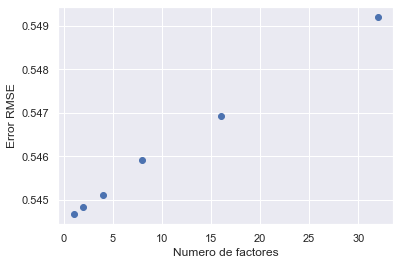

In [16]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [17]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

In [ ]:
gs.fit(data)

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

### Conclusiones:

-La precision del modelo segun la metrica seleccionada RSME es 0.55. Este numero se calcula en funcion de la cantidad de horas jugadas ade un valor (tambien calculado) llamado Calif, que es obtenido utilizando el metodo polarity de la libreria de procesamiento de lenguaje natural **surprise**. La idea fue tomar los comentarios que cada usuario hizo sobre el juego y establecer un valor de 1 a 3 para indicar si le gusto o no, los juegos a los que jugo. Sabemos que el valor utilizado como input (Calif), tiene un margen de error que podria afectar la performance del modelo.